# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

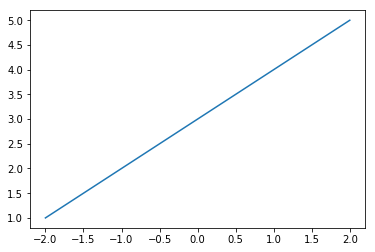

In [7]:
VLTPX = [-2,0,2]
VLTPY = [1,3,5]

plt.plot(VLTPX,VLTPY)

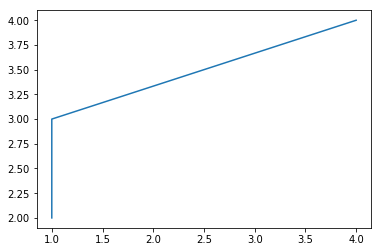

In [8]:
VLTFX = [1,1,4]
VLTFY = [2,3,4]

plt.plot(VLTFX,VLTFY)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because the vertical line would touch them in multiple points at a given time.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

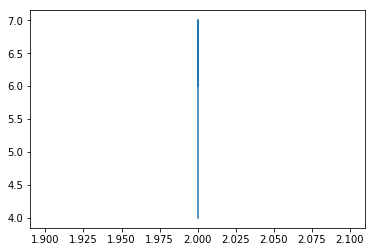

In [13]:
RX = [2,2,2]
RY = [6,7,4]

plt.plot(RX,RY)

Relation 2 is the only relation listed that is a function. That is true both due to the lines produce by these relations, and because it is the only relation with no repeating inputs.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The dimensionality of the domain m is 3, it's codomain is also 3 dimensional
The dimensionality of the domain n is 4, it's codomain is only 2 dimensional.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Perhaps is could look something like this:


m(𝑥)=(2x, 3x)

I'm not totally sure if simply scaling x by two different numbers is a way to do this, but it makes sense to me. From what I've seen, it's fine to use the same number twice as long as you aren't combining with the same number twice.


# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

p([ 1,0 ]) = [[1,1]
p([ 0,1 ]) = [3.-1]]

Q([1,0,0]) = [[4,-1,5]
Q([0,1,0]) = [1.2.5]
Q([0,0,1]) = [1.3.-2]]
This is the best I could manage as far as mkaing them look like transformation matrixes in this format.

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that don't change direction during a transformation of its space. 
Eigenvalues are the scalars the represent how the eigenvector was scaled during that transformation

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

They're incredibly hard to visualize, they can make the data seem much more sparse, and they take longer to perform logic on.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The most agreed upon rule of thumb is that you should have 5 times the number of paremeters as observations.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
from sklearn.decomposition import PCA

In [19]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [0]:
replace_dict = {'versicolor':0,'setosa':1,'virginica':2}
df['species'] = df['species'].replace(replace_dict)

In [26]:
pca = PCA(n_components = 2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)